In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
from imgaug import augmenters as iaa
%matplotlib inline
print("OpenCV Version : {}".format(cv2.__version__))

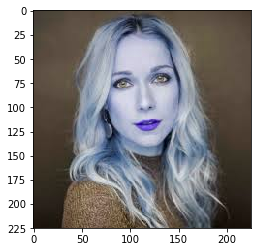

In [15]:
img = cv2.imread("example.jpg")
img.shape
plt.imshow(img)

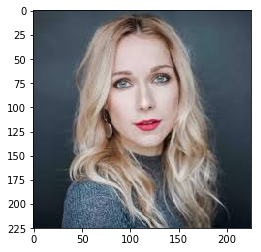

In [16]:
img = img[:,:,[2,1,0]]
plt.imshow(img)

(225, 225, 3)


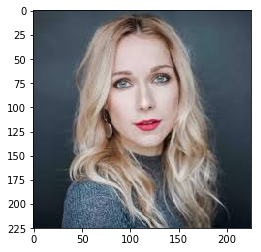

In [35]:
#seq = iaa.Sequential([iaa.Fliplr(0.5), iaa.GaussianBlur((0, 3.0))])
seq = iaa.Sometimes(0, iaa.CropAndPad(px=(0,20)))
img_aug = seq.augment_image(img)
print(img_aug.shape)
plt.imshow(img_aug)

In [21]:
img_aug = img_aug.astype(np.float32)
img_aug = (img_aug - np.mean(img_aug)) / np.std(img_aug)

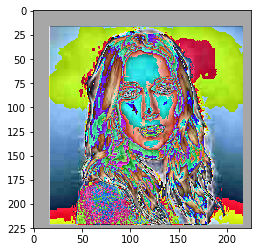

In [22]:
plt.imshow(img_aug)

In [23]:
np.mean(img_aug)

-1.2860082e-08

In [24]:
np.std(img_aug)

0.99999994

In [39]:
import helper
x = helper.load_preprocess_training_batch(1, 64)

In [43]:
feature, label = next(x)

In [44]:
type(feature)

numpy.ndarray

In [45]:
feature.shape

(64, 32, 32, 3)

In [46]:
feature.dtype

dtype('uint8')

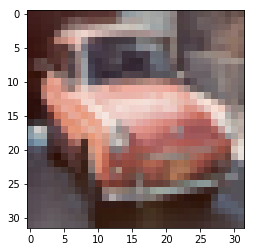

In [47]:
plt.imshow(feature[0,:,:,:])

In [69]:
seq = iaa.Sometimes(1, iaa.Crop(px=(4,4)))
feature = feature.astype(np.float32)
img_aug = seq.augment_images(feature)

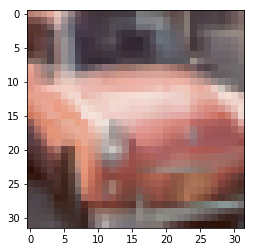

In [70]:
plt.imshow(img_aug[0,:,:,:])

In [71]:
img_aug.dtype

dtype('uint8')

In [72]:
np.sum(img_aug == feature)

5900

In [73]:
64*32*32*3

196608